    gender: 학생의 성별 (M: 남성, F: 여성)
    NationaliTy: 학생의 국적
    PlaceofBirth: 학생이 태어난 국가
    StageID: 학생이 다니는 학교 (초,중,고)
    GradeID: 학생이 속한 성적 등급
    SectionID: 학생이 속한 반 이름
    Topic: 수강한 과목
    Semester: 수강한 학기 (1학기/2학기)
    Relation: 주 보호자와 학생의 관계
    raisedhands: 학생이 수업 중 손을 든 횟수
    VisITedResources: 학생이 코스 컨텐츠에 들어온 횟수
	Viewing announcements : 학생이 과목 공지를 확인한 횟수
    Discussion: 학생이 토론 그룹에 참여한 횟수
    ParentAnsweringSurvey: 부모가 학교 설문에 참여했는지 여부
    ParentschoolSatisfaction: 부모가 학교에 만족했는지 여부
    StudentAbscenceDays: 학생의 결석 횟수 (7회 이상/미만)
    Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)

In [383]:
# pip install xgboost

In [384]:
# pip install kaggle

In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

file_name = glob('edu/academy_edu/*.csv')[0]

In [386]:
df = pd.read_csv(file_name)
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [388]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [389]:
df.describe(include=object)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,270,292,289,211


In [390]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [391]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [392]:
df['ParentAnsweringSurvey'].value_counts()

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64

In [393]:
df['Class'].value_counts().sort_index()

H    142
L    127
M    211
Name: Class, dtype: int64

In [394]:
# pip install category_encoders

In [395]:
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [396]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

### columns 생성 

In [397]:
features = df.columns[:-1].tolist()
label = 'Class'

In [398]:
set(df['NationalITy'].unique()) - set(df['PlaceofBirth'].unique())

{'KW'}

In [399]:
# 국적이 바뀜 = True , 안바뀜 = False  
df['NationalITy'] = df['NationalITy'].map(lambda x : x.replace('KW','KuwaIT'))
df['immigration'] = df['NationalITy'] != df['PlaceofBirth']

In [400]:
df['immigration'].value_counts()

False    425
True      55
Name: immigration, dtype: int64

In [401]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,immigration
0,M,KuwaIT,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,False
1,M,KuwaIT,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,False
2,M,KuwaIT,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,False
3,M,KuwaIT,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,False
4,M,KuwaIT,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,False


In [402]:
df['Topic'].value_counts().sum()

480

In [403]:
# 과목 문과 (1) or 이과 (2)
LA = ["English", "Spanish", "French", "Arabic", "History", "Quran"]
NS = ["IT", "Math", "Chemistry", "Biology", "Science", "Geology"]

In [404]:
df['major'] = np.where(df['Topic'].isin(LA),1,2)
df['major'].value_counts()

2    245
1    235
Name: major, dtype: int64

In [405]:
# 성별 여자 0 남자 1 
# df['gender'] = np.where(df['gender']=='M' ,1,0)

In [406]:
# df['gender'].value_counts()

In [407]:
# 범주형변수 순서형 인코딩 
# 남 1 여 2
# 보호자 아빠 1 엄마 2 
# 국적 1 ~ n 
# Stage 1 ~ 3 
# major 문과 1 이과 2 

enc = OrdinalEncoder(cols = ['gender','NationalITy','StageID','major','Relation'])
df = enc.fit_transform(df)
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,immigration,major
0,1,1,KuwaIT,1,G-04,A,IT,F,1,15,16,2,20,Yes,Good,Under-7,M,False,1
1,1,1,KuwaIT,1,G-04,A,IT,F,1,20,20,3,25,Yes,Good,Under-7,M,False,1
2,1,1,KuwaIT,1,G-04,A,IT,F,1,10,7,0,30,No,Bad,Above-7,L,False,1
3,1,1,KuwaIT,1,G-04,A,IT,F,1,30,25,5,35,No,Bad,Above-7,L,False,1
4,1,1,KuwaIT,1,G-04,A,IT,F,1,40,50,12,50,No,Bad,Above-7,M,False,1


In [408]:
# 원핫인코딩
df_encoding = pd.get_dummies(df.drop(['Class', 'PlaceofBirth',
                        'NationalITy','GradeID','SectionID','Topic','Semester','ParentAnsweringSurvey'], axis=1),
                   columns=['gender','ParentschoolSatisfaction','StudentAbsenceDays','immigration','major',
                            'StudentAbsenceDays'],
                   drop_first = True)
df_encoding.head()

,StageID,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_2,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7,immigration_True,major_2,StudentAbsenceDays_Under-7
0,1,1,15,16,2,20,0,1,1,0,0,1
1,1,1,20,20,3,25,0,1,1,0,0,1
2,1,1,10,7,0,30,0,0,0,0,0,0
3,1,1,30,25,5,35,0,0,0,0,0,0
4,1,1,40,50,12,50,0,0,0,0,0,0


In [409]:
# 주 보호자 

In [410]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() 
encoder.fit(df['Class'])
y = encoder.transform(df['Class'])

features = df_encoding.columns
X = df_encoding

In [411]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [412]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

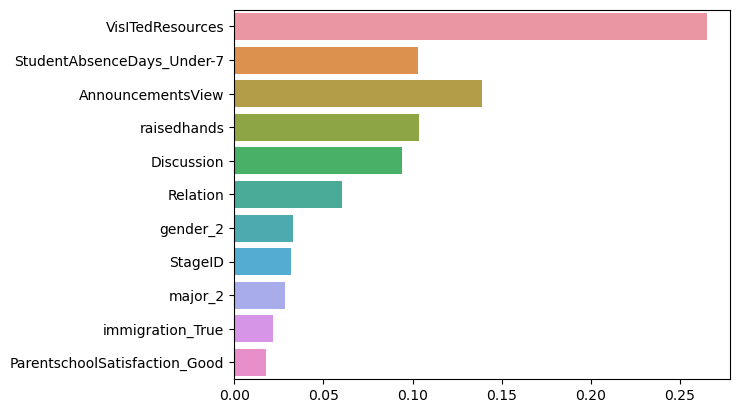

In [413]:
fi = pd.Series(model.feature_importances_)
fi.index = model.feature_names_in_
fi = fi.sort_values(ascending=False)
sns.barplot(x=fi, y=fi.index,ci=None);

In [415]:
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
(y_test == y_predict).mean()

0.75

Grid-Search CV

In [416]:
param={'criterion':['gini','entropy'], 
       'max_depth':list(range(1, 20, 2)), 
       'max_leaf_nodes':[None,2,3,4,5], 
       'min_samples_split':[2,3,4,5,6], 
       'min_samples_leaf':[1,2,3], 
       'max_features':[None,0.3, 0.5, 0.7, 0.8, 0.9,'sqrt','log2']
      }

In [417]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model, param, n_jobs=-1, cv = 10, scoring='accuracy', verbose=2,  refit=True)
result = clf.fit(X_train, y_train)

Fitting 10 folds for each of 12000 candidates, totalling 120000 fits


In [418]:
best_model = clf.best_estimator_

In [419]:
pd.DataFrame(clf.cv_results_).sort_values('rank_test_score').head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1500,0.012667,0.002848,0.006184,0.001882,gini,5,0.8,None,1,2,...,0.717949,0.842105,0.842105,0.710526,0.736842,0.657895,0.815789,0.737449,0.066756,1
9154,0.011270,0.001997,0.005984,0.000632,entropy,11,0.5,None,1,6,...,0.769231,0.710526,0.710526,0.789474,0.763158,0.631579,0.815789,0.724157,0.059792,2


In [420]:
print('train Score : {}'.format(best_model.score(X_train,y_train)))
print('test Score : {}'.format(best_model.score(X_test,y_test)))

print('GridSearchCV 최적 파라미터:', clf .best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(clf .best_score_))

train Score : 0.828125
test Score : 0.8229166666666666
GridSearchCV 최적 파라미터: {'criterion': 'gini', 'max_depth': 5, 'max_features': 0.8, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7374
